In [1]:
import yaml

In [2]:
from utils.helper import * 
from models.build_model import *

In [3]:
import seaborn as sns
box_plot_colors = sns.color_palette("Set2")
kfold = 10
split_rate=0.1
facecolor = "#FF8C94"
patchcolor = 'red'
alpha = 0.3
xlim = (0, 120)
ylim = (0, 120)
# xlim = None
# ylim = None

### run ANN model

In [4]:
ann_config_path = 'configs/ann.yaml'
with open(ann_config_path, "r") as f:
    config = yaml.safe_load(f)
ann_save_path = config["Dataset"]["save_path"]
model = build_model(config)
ann_val_res = train_model(model)
ann_test_res = predict_model_on_other_dataset(config, model) 

### run Random Forest Model

In [5]:
rf_config_path = 'configs/random_forest.yaml'
with open(rf_config_path, "r") as f:
    config = yaml.safe_load(f)
rf_save_path = config["Dataset"]["save_path"]
model = build_model(config)
rf_val_res = train_model(model)
rf_test_res = predict_model_on_other_dataset(config, model) 

### run XGBoost Model

In [6]:
xgb_config_path = 'configs/xgboost.yaml'
with open(xgb_config_path, "r") as f:
    config = yaml.safe_load(f)
xgb_save_path = config["Dataset"]["save_path"]
model = build_model(config)
xgb_val_res = train_model(model)
xgb_test_res = predict_model_on_other_dataset(config, model)


### run Ridge Model

In [7]:
ridge_config_path = 'configs/ridge_regression.yaml'
with open(ridge_config_path, "r") as f:
    config = yaml.safe_load(f)
ridge_save_path = config["Dataset"]["save_path"]
model = build_model(config)
ridge_val_res = train_model(model)
ridge_test_res = predict_model_on_other_dataset(config, model)

### draw box plot

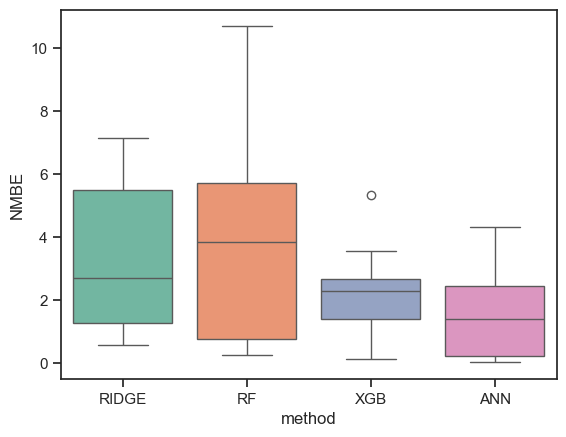

In [8]:
ridge_result_summary = f"{ridge_save_path}/results_summary.csv"
rf_result_summary = f"{rf_save_path}/results_summary.csv"
xgb_result_summary = f"{xgb_save_path}/results_summary.csv"
ann_result_summary = f"{ann_save_path}/results_summary.csv"

ridge_result_summary = read_csv(ridge_result_summary)
rf_result_summary = read_csv(rf_result_summary)
xgb_result_summary = read_csv(xgb_result_summary)
ann_result_summary = read_csv(ann_result_summary)

# make sure the order match the name lists!!!
result_lists = [ridge_result_summary, ann_result_summary, rf_result_summary, xgb_result_summary]
name_lists = ["RIDGE","RF", "XGB", "ANN"]
metric_lists = ["RMSE", "MAE", "R2", "RSR", "MAPE", "NMBE"]
plt.close("all")
df = draw_box_plot(result_lists, name_lists, metric_lists, box_plot_colors=box_plot_colors)

### draw relative plots

drawing relative plots


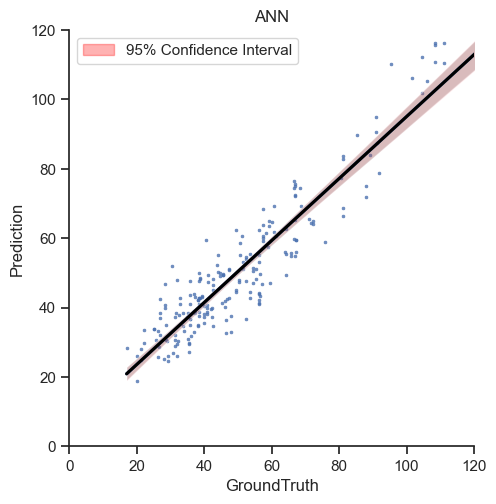

In [9]:
print("drawing relative plots")
plt.close("all")
ridge_result = f"{ridge_save_path}"
rf_result = f"{rf_save_path}"
xgb_result = f"{xgb_save_path}"
ann_result = f"{ann_save_path}"
result_lists = [ridge_result, rf_result, xgb_result, ann_result]
draw_regplots(result_lists, name_lists, folds=kfold, facecolor=facecolor, patchcolor=patchcolor, alpha=alpha, xlim=xlim, ylim=ylim)


### draw box plot on testing dataset

In [10]:
def get_metrics_from_method(dicts, method=None):
    rmse = dicts["RMSE"]
    rmae = dicts["RMAE"]
    r2 = dicts["R2"]
    rsr = dicts["RSR"]
    mape = dicts["MAPE"]
    nmbe = dicts["NMBE"]
    method = [method] * len(rmse)
    return method, rmse, rmae, r2, rsr, mape, nmbe
    
def draw_box_plot_on_test_dataset(test_res_lists):
    ann, rf, xgb, ridge = test_res_lists
    methods = []
    rmses = []
    rmaes = []
    r2s = []
    rsrs = []
    mapes = []
    nmbes = []

    # RIDGE
    method, rmse, rmae, r2, rsr, mape, nmbe = get_metrics_from_method(ridge, method="RIDGE")
    methods.extend(method)
    rmses.extend(rmse)
    rmaes.extend(rmae)
    r2s.extend(r2)
    rsrs.extend(rsr)
    mapes.extend(mape)
    nmbes.extend(nmbe)
    
    # ANN
    method, rmse, rmae, r2, rsr, mape, nmbe = get_metrics_from_method(ann, method="ANN")
    methods.extend(method)
    rmses.extend(rmse)
    rmaes.extend(rmae)
    r2s.extend(r2)
    rsrs.extend(rsr)
    mapes.extend(mape)
    nmbes.extend(nmbe)
    
    # RF
    method, rmse, rmae, r2, rsr, mape, nmbe = get_metrics_from_method(rf, method="RF")
    methods.extend(method)
    rmses.extend(rmse)
    rmaes.extend(rmae)
    r2s.extend(r2)
    rsrs.extend(rsr)
    mapes.extend(mape)
    nmbes.extend(nmbe)

    # XGB
    method, rmse, rmae, r2, rsr, mape, nmbe = get_metrics_from_method(xgb, method="XGB")
    methods.extend(method)
    rmses.extend(rmse)
    rmaes.extend(rmae)
    r2s.extend(r2)
    rsrs.extend(rsr)
    mapes.extend(mape)
    nmbes.extend(nmbe)

    df = pd.DataFrame()
    print(len(methods), len(rmses))
    df["method"] = methods
    df["RMSE"] = rmses
    df["MAE"] = rmaes
    df["R2"] = r2s
    df["RSR"] = rsrs
    df["MAPE"] = mapes
    df["NMBE"] = nmbes

    # metric lists
    plt.close("all")
    sns.boxplot(x=df["method"], y=df["RMSE"], palette=box_plot_colors[:4], hue=df["method"])
    plt.savefig("results/box_plot_testset_RMSE.png")

    plt.close("all")
    sns.boxplot(x=df["method"], y=df["MAE"], palette=box_plot_colors[:4], hue=df["method"])
    plt.savefig("results/box_plot_testset_MAE.png")

    plt.close("all")
    sns.boxplot(x=df["method"], y=df["R2"], palette=box_plot_colors[:4], hue=df["method"])
    plt.savefig("results/box_plot_testset_R2.png")

    plt.close("all")
    sns.boxplot(x=df["method"], y=df["RSR"], palette=box_plot_colors[:4], hue=df["method"])
    plt.savefig("results/box_plot_testset_RSR.png")

    plt.close("all")
    sns.boxplot(x=df["method"], y=df["MAPE"], palette=box_plot_colors[:4], hue=df["method"])
    plt.savefig("results/box_plot_testset_MAPE.png")

    plt.close("all")
    sns.boxplot(x=df["method"], y=df["NMBE"], palette=box_plot_colors[:4], hue=df["method"])
    plt.savefig("results/box_plot_testset_NMBE.png")

40 40


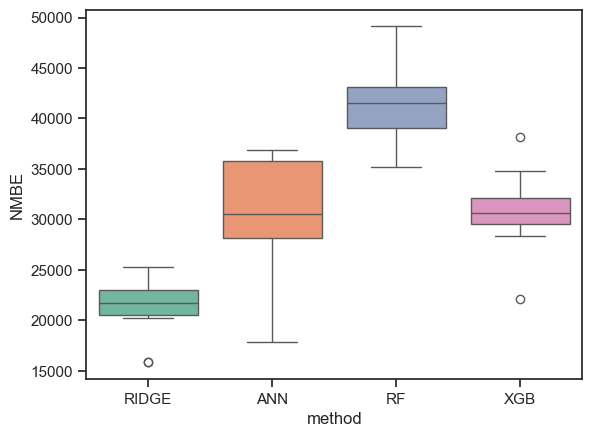

In [11]:
draw_box_plot_on_test_dataset([ann_test_res, rf_test_res, xgb_test_res, ridge_test_res])